## **Assignment 1: Natural Language Processing**

### **Creating Word Cloud and Plotting Word Frequencies from Blog articles**

#### ***(I) Web Scraping Blog Articles from the Web***

**Step 1: Using requests library to access the blog articles** </br>
The Requests Library in Python enables interaction with the web. Using this library we ping the website or portal for information. Herein, I am trying to access the blog article on "Latest Trends in GIS" published on Geospatial World Online Magazine.

In [3]:
#Storing the url blog for GIS trends in 2019
url='https://www.geospatialworld.net/blogs/gis-and-spatial-analytics-market/'

In [4]:
#Using requests library for 
import requests

r=requests.get(url)
html=r.text

In [5]:
from bs4 import BeautifulSoup
import lxml

soup=BeautifulSoup(html,'lxml')
print(soup.title)

<title>GIS and Spatial Analytics market to touch US$88.3 Billion by 2020!</title>


In [6]:
#Find the paragraphs
soup.find_all('p')[:1]

[<p>Geography, enriched by information systems to form the Geographic Information System or GIS, is growing exponentially. A core geospatial technology, the GIS is used virtually in every field, adding value to practically every business segment and application areas. In text, the genesis of GIS platforms (solutions/software) lies in capturing, analyzing, and presenting spatial and non-spatial information as effective visualizations. In reality, the segment is much more! The segment includes fast-growth engineering, and construction project designs, 3D Modeling with spatial data. Integration platforms, the field of location analytics and much more to bring about holistic situation awareness and provide real-time insights into operations. <strong>Jack Dangermond, Founder, and CEO, Esri, USA</strong>, sums the importance and opportunity from the GIS/Spatial Analytics segment much accurately, <em>“GIS is being applied virtually in every field of human endeavor. The very same geospatial us

In [7]:
#save the data in text variable
for script in soup(["script", "style"]):
    script.extract()
text=soup.get_text()
lines = (line.strip() for line in text.splitlines())
chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
text = '\n'.join(chunk for chunk in chunks if chunk)
#print(text)

In [8]:
#save the data to a txt file
fileout = open("webtext.txt",mode="w", encoding="utf-8")
fileout.write(text)
fileout.close()

In [9]:
!conda install -c conda-forge wordcloud==1.4.1 --yes

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cryptography-2.5           |   py36h1ba5d50_0         643 KB
    conda-4.6.3                |           py36_0         872 KB  conda-forge
    openssl-1.1.1a             |    h14c3975_1000         4.0 MB  conda-forge
    libarchive-3.3.3           |       h5d8350f_5         1.5 MB
    grpcio-1.16.1              |   py36hf8bcb03_1         1.1 MB
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    libssh2-1.8.0              |                1         239 KB  conda-forge
    python-3.6.8               |       h0371630_0        34.4 MB
    ------------------------------------------------------------
                                           Total:        43.0 MB

The fol

In [10]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [11]:
df=open("webtext.txt","r")
contents=df.read()
print(contents)

GIS and Spatial Analytics market to touch US$88.3 Billion by 2020!
HomeGIS & MapsEarth ObservationGNSS & PositioningLiDARLocation TechUAVsBIM & ModelingTrending TechMagazineRead Latest EditionDownload Media KitFree Digital MagazineGet Print MagazineGeospatial World Editorial Calendar 2019
Search
About UsEditorial BoardNewsPress ReleasesSubmit Press ReleaseArticlesGeospatial ApplicationsTechnologyBusiness ArticlesCover StoriesOpinionLaw & policyThesisSubmit ArticleBlogsVideosWebinarsEventsCompaniesContact Us
Geospatial World
HomeGIS & MapsEarth ObservationGNSS & PositioningLiDARLocation TechUAVsBIM & ModelingTrending TechMagazineRead Latest EditionDownload Media KitFree Digital MagazineGet Print MagazineGeospatial World Editorial Calendar 2019
Home
Blogs
The global GIS and Spatial Analytics market to touch US$88.3 Billion by...BlogsThe global GIS and Spatial Analytics market to touch US$88.3 Billion by 2020By Ananya Narain - 05/16/2018SHARE Facebook Twitter
Geography, enriched by inform

In [12]:
wordcloud = WordCloud().generate(contents)

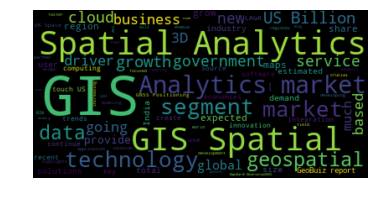

In [13]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

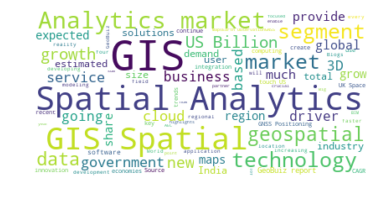

In [14]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

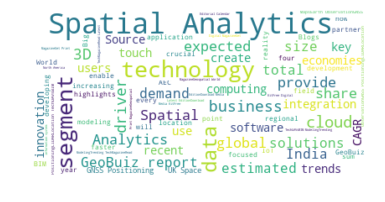

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(["market","much","growth","industry","based","user","US","Billion","going","service","region","services","maps","GIS","new","continue","government","geospatial","grow"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
#Use regex package from Natural Language Toolkit for splitting words into a list
import re

In [17]:
#Tokenize the words
tokens = re.findall('\w+', contents)
tokens[:8]

['GIS', 'and', 'Spatial', 'Analytics', 'market', 'to', 'touch', 'US']

In [18]:
#Remove stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

In [20]:
words_ns = []
for word in tokens:
    if word not in sw:
        words_ns.append(word)

words_ns[:5]

['GIS', 'Spatial', 'Analytics', 'market', 'touch']

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

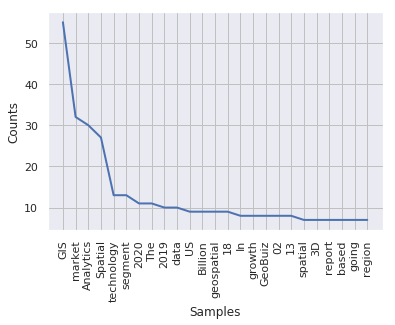

In [22]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

#### ***Final Step: To build a Word Counter***

In [37]:
import requests
from bs4 import BeautifulSoup
import lxml
!conda install -c conda-forge wordcloud==1.4.1 --yes
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('stopwords')

Solving environment: done

# All requested packages already installed.

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
def word_freq(url):
    r=requests.get(url)
    html=r.text
    soup=BeautifulSoup(html,'lxml')
    
    for script in soup(["script", "style"]):
        script.extract()
        text=soup.get_text()
        lines = (line.strip() for line in text.splitlines())
        chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
        text = '\n'.join(chunk for chunk in chunks if chunk)
    
    fileout = open("webtext.txt",mode="w", encoding="utf-8")
    fileout.write(text)
    
    df=open("webtext.txt","r")
    contents=df.read()
    
    stopwords = set(STOPWORDS)
    #stopwords.update(["market","much","growth","industry","based","user","US","Billion","going","service","region","services","maps","GIS","new","continue","government","geospatial","grow"])
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    tokenizer=RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    
    words=[]
    for word in tokens:
        words.append(word.lower())
        
    sw = nltk.corpus.stopwords.words('english')
    
    words_ns = []
    for word in tokens:
        if word not in sw:
            words_ns.append(word)
            
    %matplotlib inline
    sns.set()
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

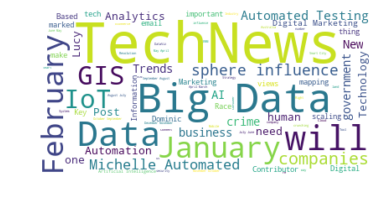

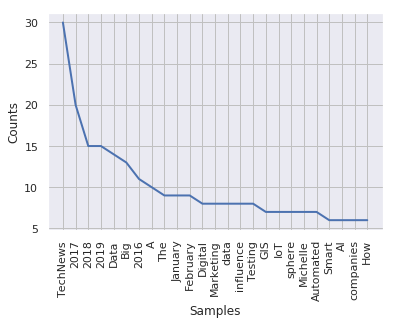

In [39]:
word_freq('https://ecmapping.com/2017/11/29/6-key-trends-that-will-influence-gis-in-2018/')